In [143]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.signal import find_peaks, peak_widths, find_peaks_cwt

plt.rcParams['figure.figsize'] = [15, 10]

'hello world'


'hello world'

In [144]:
dataFile = 'SulphurFinal.txt'
wavenumber, spectrum = np.loadtxt(dataFile, skiprows=1, dtype=float, usecols=(0, 1), delimiter=',', unpack=True)

(0.0, 0.02)

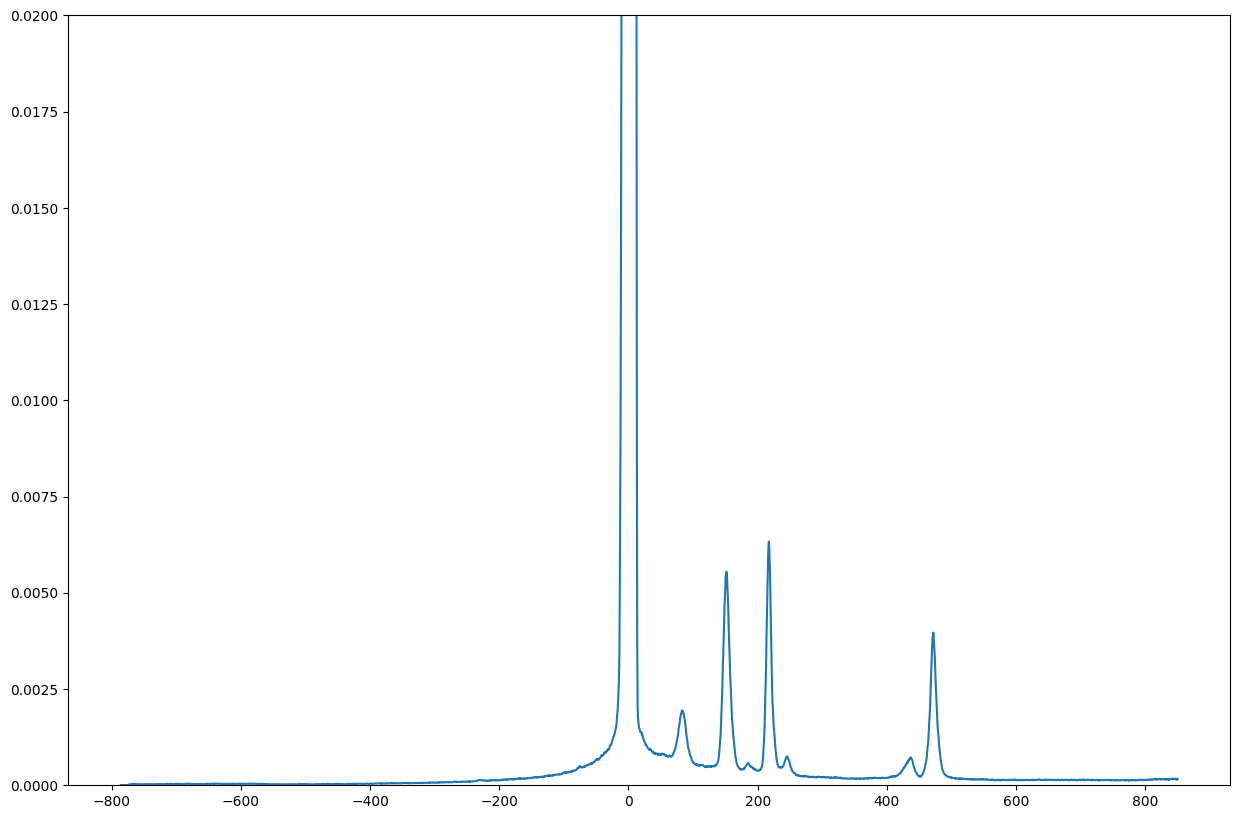

In [145]:
plt.plot(wavenumber, spectrum)
plt.ylim(0, 0.02)

6


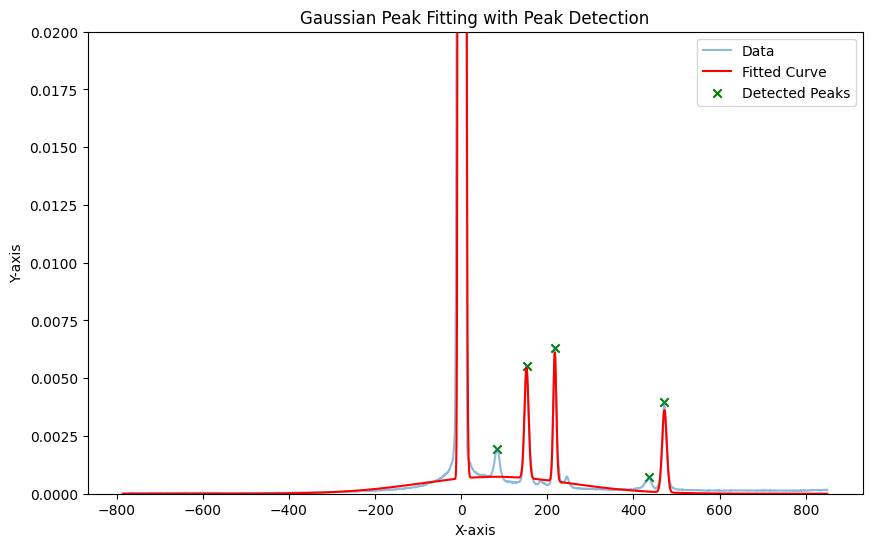

Optimized Parameters (amplitude, center, width for each Gaussian):
Peak 1: Amplitude=0.942, Center=-1.408, Width=2.648
Peak 2: Amplitude=0.241, Center=4.660, Width=-3.770
Peak 3: Amplitude=0.005, Center=151.798, Width=4.732
Peak 4: Amplitude=0.006, Center=217.440, Width=3.615
Peak 5: Amplitude=0.001, Center=79.399, Width=174.517
Peak 6: Amplitude=0.004, Center=472.005, Width=5.372


IndexError: index 18 is out of bounds for axis 0 with size 18

In [146]:
from scipy.optimize import curve_fit

def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x - cen) ** 2 / (2 * wid ** 2))

# Define a function to represent the sum of multiple Gaussian peaks
def multi_gaussian(x, *params):
    num_peaks = len(params) // 3
    result = np.zeros_like(x)
    
    for i in range(num_peaks):
        amp = params[i * 3]
        cen = params[i * 3 + 1]
        wid = params[i * 3 + 2]
        result += gaussian(x, amp, cen, wid)
    
    return result

true_params = [
    1, -8, 1,
    0.8, -5, 0.5,
    0.6, 0, 0.7,
    0.7, 5, 0.4,
    0.9, 8, 0.9,
    1.2, -7, 0.9,
    1.1, -3, 1,
    1.0, 2, 1.5,
    0.5, 6, 0.6,
    0.3, 9, 0.3
]

# Use find_peaks to identify peaks in the noisy data
peaks, _ = find_peaks(spectrum, prominence=0.0003)

print(len(peaks))

# Initial guess for parameters based on detected peaks
initial_guess = []
for peak in peaks:
    # Amplitude, center, and width estimation
    amp = spectrum[peak]
    cen = wavenumber[peak]
    wid = 1  # You may adjust this based on expected width
    initial_guess.extend([amp, cen, wid])

# # Ensure we have 27 parameters for 9 Gaussians (9 peaks)
# while len(initial_guess) < 27:
#     initial_guess.extend([1, 0, 1])  # Default values for additional Gaussians if fewer detected

# Perform the curve fitting
popt, pcov = curve_fit(multi_gaussian, wavenumber, spectrum, p0=initial_guess)

# Generate fitted data
y_fit = multi_gaussian(wavenumber, *popt)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(wavenumber, spectrum, label='Data', alpha=0.5)
plt.plot(wavenumber, y_fit, label='Fitted Curve', color='red')
plt.scatter(wavenumber[peaks], spectrum[peaks], color='green', marker='x', label='Detected Peaks')
plt.title('Gaussian Peak Fitting with Peak Detection')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.ylim(0, 0.02)
plt.legend()
plt.show()

# Print the optimized parameters
print("Optimized Parameters (amplitude, center, width for each Gaussian):")
for i in range(9):
    print(f"Peak {i+1}: Amplitude={popt[i*3]:.3f}, Center={popt[i*3+1]:.3f}, Width={popt[i*3+2]:.3f}")